In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Метод Эйлера (forward Euler method)

In [20]:
def planet_2d_euler(x_0, y_0, vx_0, vy_0, Mc, m, dt, N):
    '''
    x_0, y_0 - начальные координаты [м]
    vx_0, vy_0 - начальные скорости [м/с]
    Mc - масса звезды [кг]
    m - масса планеты [кг] - будто бы не нужна
    dt - шаг по времени [с]
    N - количество шагов [шт]
    '''
    G = 6.67430e-11

    r = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    t = np.linspace(0, N * dt, N + 1)

    r[0] = [x_0, y_0]
    v[0] = [vx_0, vy_0]

    E = np.zeros(N + 1)
    r0_norm = np.linalg.norm(r[0])


    E[0] = 0.5 * m * np.dot(v[0], v[0]) - G * Mc * m / r0_norm
    
    for n in range(N):
        pos = r[n]
        r_norm = np.linalg.norm(pos)
        if r_norm == 0:
            pass

        acceleration = -G * Mc * pos / (r_norm ** 3)

        r[n + 1] = r[n] + v[n] * dt
        v[n + 1] = v[n] + acceleration * dt

        r_new_norm = np.linalg.norm(r[n + 1])
        E[n + 1] = 0.5 * m * np.dot(v[n + 1], v[n + 1]) - G * Mc * m / r_new_norm
         

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(r[:, 0], r[:, 1], 'r-', linewidth=1.2, label='Траектория (Эйлера)')
    plt.plot(0, 0, 'yo', markersize=12, label='Звезда')
    plt.plot(x_0, y_0, 'go', markersize=8, label='Начало')
    plt.xlabel('x (м)')
    plt.ylabel('y (м)')
    plt.title('Метод Эйлера: траектория')
    plt.axis('equal')

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(t / (24 * 3600), E, 'r-', linewidth=1.2)
    plt.xlabel('Время (в днях)')
    plt.ylabel('Полная энергия')
    plt.title('Метод Эйлера')
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(y=E[0], color='k', linestyle='--', linewidth=1, label='E')
    plt.legend()

    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()

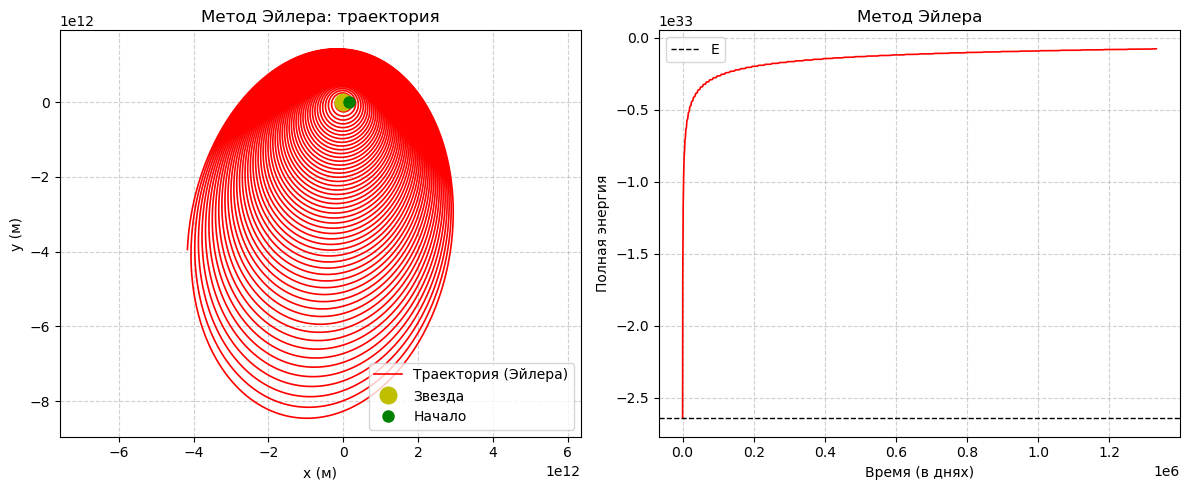

<Figure size 640x480 with 0 Axes>

In [40]:
M_sun = 1.989e30
M_earth = 5.972e24 
x0 = 1.5e11
y0 = 0.0
G = 6.67430e-11


v_circ = np.sqrt(G * M_sun / x0)
vx0 = 0.0
vy0 = v_circ

dt = 315360
N = 365 * 1000  

planet_2d_euler(x0, y0, vx0, vy0, M_sun, M_earth, dt, N)

# Метод Эйлера-Кромера (Semi-implicit Euler method)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def planet_2d_euler_cromer(x_0, y_0, vx_0, vy_0, Mc, m, dt, N):
    '''
    x_0, y_0 - начальные координаты [м]
    vx_0, vy_0 - начальные скорости [м/с]
    Mc - масса звезды [кг]
    m - масса планеты [кг]
    dt - шаг по времени [с]
    N - количество шагов [шт]
    '''
    G = 6.67430e-11

    r = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    t = np.linspace(0, N * dt, N + 1)
    
    r[0] = [x_0, y_0]
    v[0] = [vx_0, vy_0]

    E = np.zeros(N + 1)
    r0_norm = np.linalg.norm(r[0])
    E[0] = 0.5 * m * np.dot(v[0], v[0]) - G * Mc * m / r0_norm

    for n in range(N):
        pos = r[n]
        r_norm = np.linalg.norm(pos)
        if r_norm == 0:
            raise ValueError("Нельзя расположиться в начале координат.")
        
        acceleration = -G * Mc * pos / (r_norm ** 3)

        v[n+1] = v[n] + acceleration * dt
        r[n+1] = r[n] + v[n+1] * dt

        r_new_norm = np.linalg.norm(r[n + 1])
        E[n + 1] = 0.5 * m * np.dot(v[n + 1], v[n + 1]) - G * Mc * m / r_new_norm

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(r[:, 0], r[:, 1], 'r-', linewidth=1.2, label='Траектория (Эйлера-Кромера)')
    plt.plot(0, 0, 'yo', markersize=12, label='Звезда')
    plt.plot(x_0, y_0, 'go', markersize=8, label='Начало')
    plt.xlabel('x (м)')
    plt.ylabel('y (м)')
    plt.title('Метод Эйлера-Кромера')
    plt.axis('equal')
    
    plt.grid(True, alpha=0.6)
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(t / (24 * 3600), E, 'r-', linewidth=5)
    plt.xlabel('Время (в днях)')
    plt.ylabel('Полная энергия')
    plt.ylim(-3e33, 0)
    plt.title('Метод Эйлера-Кромера')

    plt.grid(True, alpha=0.6)
    plt.axhline(y=E[0], color='k', linewidth=0.1, label='E')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
M_sun = 1.989e30
M_earth = 5.972e24 
x0 = 1.5e11
y0 = 0.0
G = 6.67430e-11


v_circ = np.sqrt(G * M_sun / x0)
vx0 = 0.0
vy0 = v_circ

dt = 600*10
N = 365 * 1000  

planet_2d_euler(x0, y0, vx0, vy0, M_sun, M_earth, dt, N)

UnboundLocalError: cannot access local variable 'r_norm' where it is not associated with a value

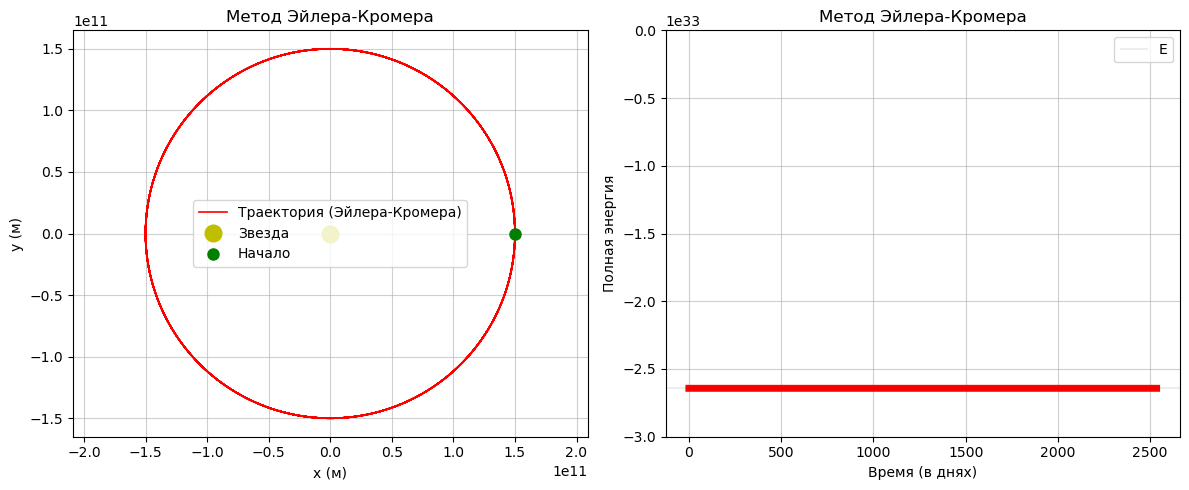

In [9]:
M_sun = 1.989e30
M_earth = 5.972e24 
x0 = 1.5e11
y0 = 0.0
G = 6.67430e-11


v_circ = np.sqrt(G * M_sun / x0)
vx0 = 0.0
vy0 = v_circ

dt = 600
N = 365 * 1000  

planet_2d_euler_cromer(x0, y0, vx0, vy0, M_sun, M_earth, dt, N)

# Что-то поточнее (Verlet)

In [10]:
def planet_2d_verlet(x_0, y_0, vx_0, vy_0, Mc, m, dt, N):
    r = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    t = np.linspace(0, N * dt, N + 1)
    
    r[0] = [x_0, y_0]
    v[0] = [vx_0, vy_0]

    pos = r[0]
    r_norm = np.linalg.norm(pos)
    if r_norm == 0:
        raise ValueError("Нельзя расположиться в начале координат.")
    a = -G * Mc * pos / (r_norm ** 3)
    
    E = np.zeros(N + 1)
    E[0] = 0.5 * m * np.dot(v[0], v[0]) - G * Mc * m / r_norm

    for n in range(N):
        r[n + 1] = r[n] + v[n] * dt + 0.5 * a * dt**2

        pos_new = r[n + 1]
        r_norm_new = np.linalg.norm(pos_new)

        if r_norm_new == 0:
            raise RuntimeError(f"Столкновение на шаге {n}!")

        a_new = -G * Mc * pos_new / (r_norm_new ** 3)

        v[n + 1] = v[n] + 0.5 * (a + a_new) * dt
        a = a_new

        E[n + 1] = 0.5 * m * np.dot(v[n + 1], v[n + 1]) - G * Mc * m / r_norm_new

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(r[:, 0], r[:, 1], 'r-', linewidth=1.2, label='Траектория (Verlet)')
    plt.plot(0, 0, 'yo', markersize=12, label='Звезда')
    plt.plot(x_0, y_0, 'go', markersize=8, label='Начало')
    plt.xlabel('x (м)')
    plt.ylabel('y (м)')
    plt.title('Verlet Method')
    plt.axis('equal')
    plt.grid(True, alpha=0.6)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(t / (24 * 3600), E, 'r-', linewidth=1.2)
    plt.xlabel('Время (дни)')
    plt.ylabel('Полная энергия (Дж)')
    plt.title('E (Verlet)')
    plt.grid(True, alpha=0.6)

    plt.tight_layout()
    plt.show()

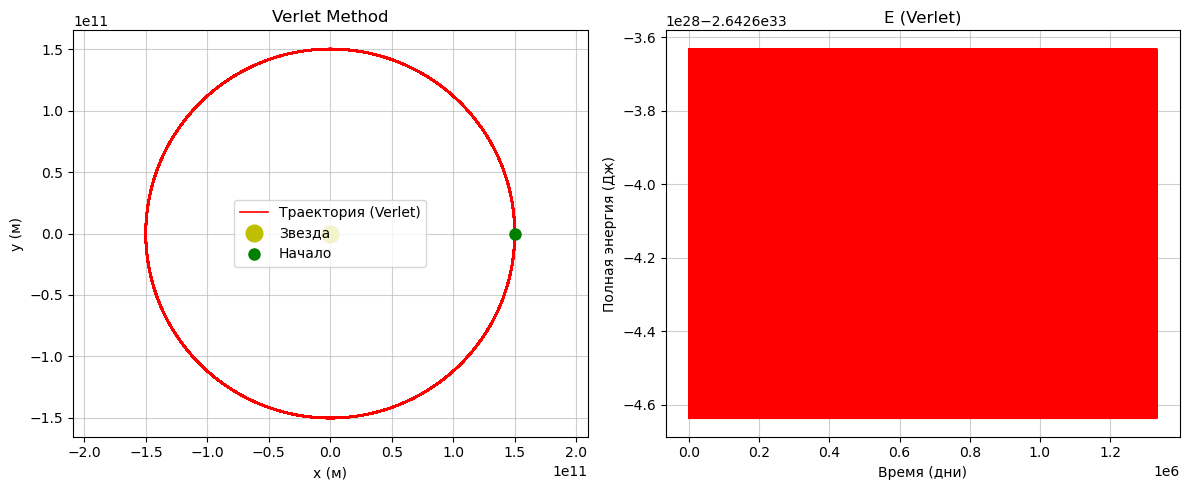

In [36]:
M_sun = 1.989e30
M_earth = 5.972e24 
x0 = 1.5e11
y0 = 0.0
G = 6.67430e-11


v_circ = np.sqrt(G * M_sun / x0)
vx0 = 0.0
vy0 = v_circ

dt = 315360
N = 365 * 1000  

planet_2d_verlet(x0, y0, vx0, vy0, M_sun, M_earth, dt, N)